In [54]:
# Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
list_of_class1 = os.listdir("malaria/Parasitized")
list_of_class0 = os.listdir("malaria/Uninfected")

labels1 = np.ones(len(list_of_class1))
labels0 = np.zeros(len(list_of_class0))
labels = np.concatenate((labels1, labels0), axis=0)

dataset = []
dim = (100, 100)
for img in list_of_class1:
  image = cv2.imread("malaria/Parasitized/" + str(img))
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  dataset.append(resized)

for img in list_of_class0:
  image = cv2.imread("malaria/Uninfected/" + str(img))
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  dataset.append(resized)

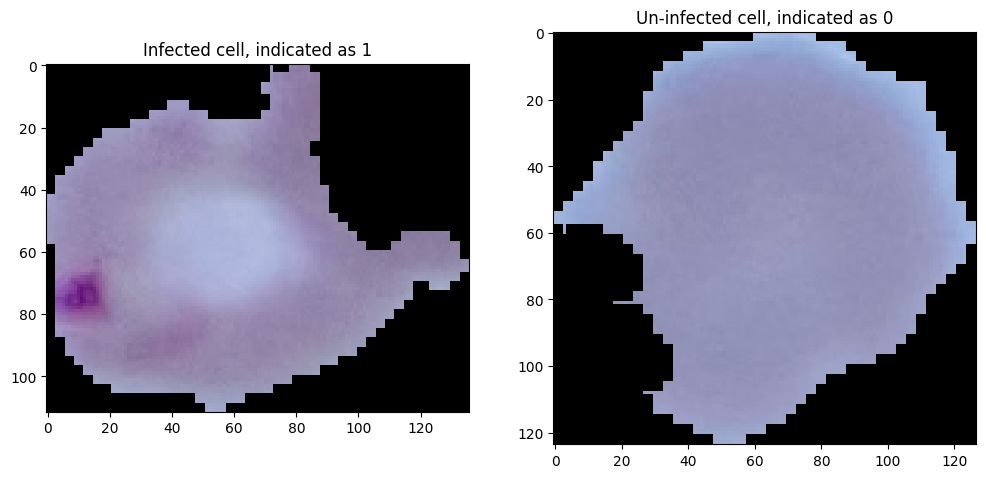

In [56]:
# Visualize the data so we can see what we are working with.
img_infected = cv2.imread('malaria/Parasitized/C39P4thinF_original_IMG_20150622_105335_cell_21.png')
img_uninfected = cv2.imread('malaria/Uninfected/C1_thinF_IMG_20150604_104919_cell_84.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.set_title("Infected cell, indicated as 1")
ax1.imshow(img_infected)
ax2.set_title("Un-infected cell, indicated as 0")
ax2.imshow(img_uninfected)

In [57]:
from sklearn.model_selection import train_test_split

dataset = np.array(dataset)
labels = np.array(labels)

dataset = dataset[np.arange(dataset.shape[0])]
labels = labels[np.arange(dataset.shape[0])]

X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print("", X_train.shape, "\n", y_train.shape, 
      "\n", X_val.shape, "\n", y_val.shape,
      "\n", X_test.shape, "\n", y_test.shape)

 (700, 100, 100, 3) 
 (700,) 
 (150, 100, 100, 3) 
 (150,) 
 (150, 100, 100, 3) 
 (150,)


In [58]:
# Create the model
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(100, 100, 3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(32, activation="relu"))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(2 , activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 10, 10, 64)      

In [59]:
# Crate a callback for efficiency purposes
my_callback = EarlyStopping(monitor='accuracy', patience=3)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [66]:
history = model.fit(X_train,
                    steps_per_epoch = len(X_train),
                    epochs =20,
                    validation_data = X_val,
                    validation_steps=len(X_val),
                    callbacks=[my_callback])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

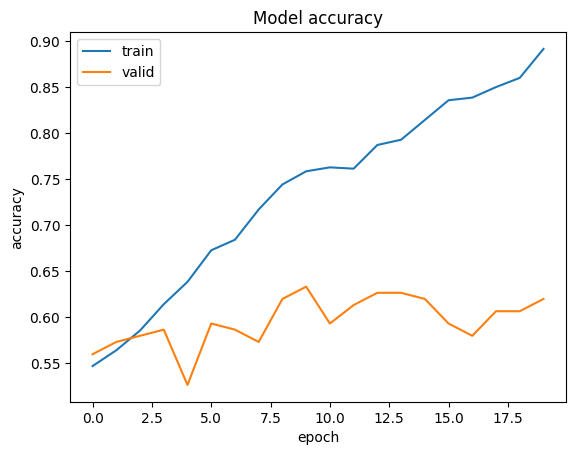

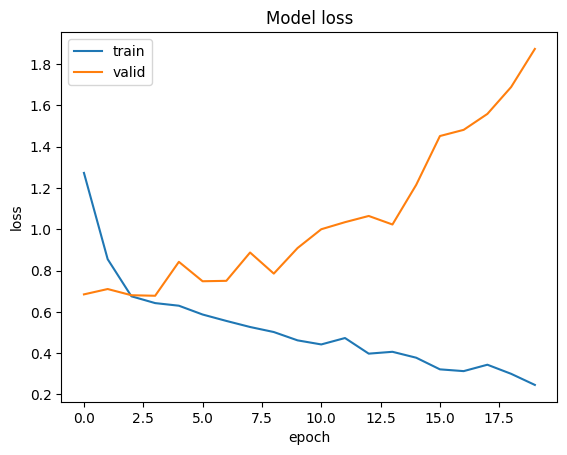

In [ ]:
from matplotlib import pyplot as plt

def display_history(history):
    """Summarize history for accuracy and loss.
    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    
display_history(history);

In [34]:
(model_loss, model_accuracy) = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 27ms/step - loss: 1.9897 - accuracy: 0.5333
